<a href="https://colab.research.google.com/github/matheussmoreira/pendulo/blob/main/pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math

# METODOS NUMERICOS

def calc_y(h, t, y, f):
    k1 = h * np.array(f(t, y))
    k2 = h * np.array(f(t+h/2, y+k1/2))
    k3 = h * np.array(f(t+h/2, y+k2/2))
    k4 = h * np.array(f(t+h, y+k3))

    return y + ((k1 + 2*k2 + 2*k3 + k4)/6)
# End calc_y()

def runge_kutta(t0, t1, h, variaveis, f):
    ys = [variaveis]
    ts = [t0]

    ti = t0
    yi = variaveis

    while (ti<t1):
        yi = calc_y(h, ti, yi, f)
        ti += h

        ts.append(ti)
        ys.append(yi)

    return [ts, ys]
# End runge_kutta()

def runge_kutta_adapt(t0, t1, variaveis, f, h):
    ys = [variaveis]
    ts = [t0]

    tol = 1e-5
    print(tol)
    ti = t0
    yi = variaveis

    while (ti<t1):
        # Ajusta passo largo
        # print(ti)
        # print(h)
        # print(t1)
        # print("\n")
        if (ti+h > t1):
            h = t1 - ti

        y1 = calc_y(h, ti, yi, f)
        y2 = calc_y(h/2, ti, yi, f)
        y2 = calc_y(h/2, ti, y2, f)

        delta = (y2-y1)/15
        fator = pow(tol/math.fabs(delta), 1/5)
        
        if (fator[0] >= 1.0):
            yi += y2+delta
            h = min(1.2, fator[0]) * h
            ti += h
        else:
            h = 0.8 * fator[0] * h

        ts.append(ti)
        ys.append(yi)

    return [ts, ys]
# End runge_kutta_adapt()

In [3]:
import math
import numpy as np


# CONSTANTES FISICAS

g = 9.8 # m/s^2
l = 1.0 # m
theta_0 = np.radians(10)

# FORMULAS PENDULO

def mov_pendulo(t, variaveis):
  theta, omega = variaveis
  dtheta = omega
  domega = -(g / l) * np.sin(theta)
  return [dtheta, domega]

def mov_pendulo_simp(theta):
  return theta + g/l * theta

def sol_analitica(theta_0, t):
  raiz = math.sqrt(g/l)
  #print("raiz", raiz)
  #print("return", theta_0 * math.cos(raiz*t))
  return theta_0 * math.cos(raiz*t)

def periodo_simp():
  raiz = math.sqrt(l/g)
  return 2 * math.pi * raiz

def periodo(t1, t2, v1, v2):
  div = abs(v1)/(abs(v1)+abs(v2))
  diff = t2 - t1
  return 2 * (t1 + div * diff)

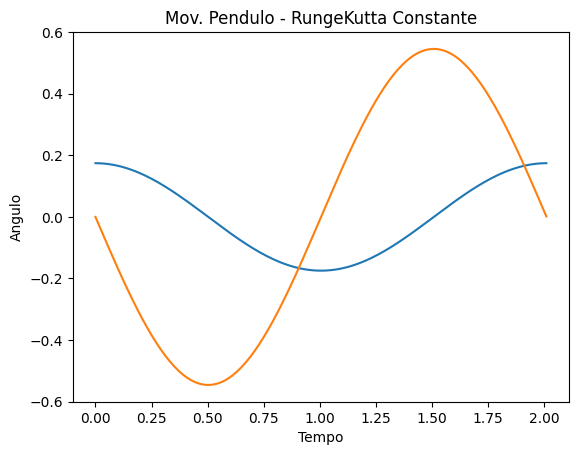

In [4]:
# MAIN

import matplotlib.pyplot as plt
import math

# Variaveis dos experimentos
h_1 = 0.01

# Constantes
t0 = 0.0
omega_0 = 0.0
t1 = periodo_simp()

# Resultados
ts_1, ys_1 = runge_kutta(t0, t1, h_1, [theta_0, omega_0], mov_pendulo)
ys_2 = []
for i in range(len(ys_1)):
  ys_2.append(ys_1[i][0])

plt.plot(ts_1,ys_1)
plt.xlabel('Tempo')
plt.ylabel('Angulo')
plt.title('Mov. Pendulo - RungeKutta Constante')
plt.show()

#Solução Analítica
# t0 = 0.0
# t1 = periodo_simp()
# ys_1 = []
# ts_1 = []
# while(t0 < t1):
#   ys_1.append(sol_analitica(theta_0, t0))
#   ts_1.append(t0)
#   t0 += h_1

# plt.plot(ts_1,ys_1)
# plt.xlabel('Tempo')
# plt.ylabel('Angulo')
# plt.title('Mov. Pendulo - Solução Analítica')
# plt.show()

# ts_1_adapt, ys_1_adapt = runge_kutta_adapt(t0, t1, [theta_0, omega_0], mov_pendulo, h_1)

# plt.plot(ts_1_adapt,ys_1_adapt)
# plt.xlabel('Tempo')
# plt.ylabel('Angulo')
# plt.title('Mov. Pendulo - RungeKutta Adaptativo')
# plt.show()
